# 1.Background（背景）

基于上述最优子集、逐步回归、LASSO回归筛选出的变量分别进行回归模型构建后，我们将涉及模型的评价，根据数据集的来源不同，可以通过内部验证和（或）外部验证对模型的区分度（Discrimination）、校准度（Calibration）和决策曲线三个方面进行评价。

# 2.原理和方法

## 2.1 评价指标

### 2.1.1 区分度（Discrimination）

区分度（Discrimination），又称为模型的判别能力或排序能力，用于评价模型区分个体相对风险水平的能力，即发生终点事件的患者应有相对较高的预测发生概率，未发生终点事件的患者应有相对较低的预测概率。衡量区分度最常用的的指标是C统计量，或称C指数（C-index）。

C统计量是给定两个人（一个人发生事件，另一个人没有发生事件），该模型估计的第一个病人风险高于第二个病人的概率。它是基于模型的风险估计和观察到的结局事件之间一致性（concordance）的度量（因此称为“C统计量”）。C统计量可以测量模型将患者从高风险到低风险排序的能力，但不评估模型预测事件发生的准确概率的能力（其通过模型的校准度进行衡量）。

在针对二分类结局事件的预测模型中，C统计量等价于受试者工作特征曲线（ROC）下面积（AUC）。ROC曲线是反映模型敏感性与特异性之间关系的曲线。其X轴为1–特异度（假阳性率）， Y轴称为敏感度（真阳性率），将各阈值概率下计算的不同的敏感度与特异度描点连线，则得ROC曲线，其与X轴所围面积即AUC。两个指标均是评价预测模型区分度的常见指标，均一般在0.5（随机一致性）到1（完全一致性）之间。通常来说，对于二分类变量的预测模型，C统计量或AUC判别的常用标准为：
>1. 低于0.60说明模型的区分度较差;
>2. 0.6- 0.75说明模型的区分度可能有意义;
>3. 大于0.7说明模型的区分度明显有意义。

>1. less than 0.60 reflects poor discrimination; 
>2. 0.60 to 0.75, possibly helpful discrimination;
>3. more than 0.75, clearly useful discrimination


REF
1. Pencina MJ, D'Agostino RB Sr. Evaluating Discrimination of Risk Prediction Models: The C Statistic. JAMA. 2015;314(10):1063-1064. doi:10.1001/jama.2015.11082
2. Alba AC, Agoritsas T, Walsh M, et al. Discrimination and Calibration of Clinical Prediction Models: Users' Guides to the Medical Literature. JAMA. 2017;318(14):1377-1384. doi:10.1001/jama.2017.12126

### 2.1.2 校准度（Calibration）

一个模型只有良好的区分度是不够的，因为其仅代表相对风险排序。而临床是复杂的，对于50%的风险和80%的风险，我们的临床决策可能不同，这就引出了校准度的概念。校准度指预测与实际结果之间的一致性，可用来反映模型的绝对风险预测值是否准确。校准度的评估思路可以是：

1. 根据研究对象在时间t的事件发生的预测概率进行分组；
2. 在各组中计算时间t的事件发生的平均预测概率；
3. 在各组中通过拟合该组的Kaplan-Meier生存函数来计算在时间t的事件发生的观测概率；
4. 在各组中比较平均预测概率和观测概率，可使用散点图，校准度图等（校准度图按照预测概率进行等分组，横坐标为预测的生存率，纵坐标为实际的生存率，对角线是预测概率等于实际概率，偏离对角线越远说明预测的误差越大）；
5. 通过统计检验的方法（如Hosmer-Lemeshow检验等）也可以对预测概率与实际观测概率之间的差异程度进行显著性检验，从而评估校准度，但是均存在各种局限性。

### 2.1.3 决策曲线（Decision curve analysis)

模型预测再准确，也始终会有假阳性和假阴性存在，我们根据模型的预测结果去干预病人，这里面就有一个干预划不划得来的问题（例如对假阳性的病人进行干预是亏损的）。决策曲线引入了阈概率，表示的是只有病人的预测概率超过这个阈概率，干预才有受益，但阈概率本身我们是不知道的，我们关心训练出来的模型是否在任何阈概率情况下都是有收益的，都是值得应用的，这就是决策曲线要帮助我们回答的问题。该方法由纪念斯隆凯特琳癌症研究所的Andrew Vickers博士2006年在Medical Decision Making期刊上首次提出，而后得到了普遍应用。其绘制方法为：

Ref:
1. Fitzgerald M, Saville BR, Lewis RJ. Decision curve analysis. JAMA. 2015;313(4):409-410. doi:10.1001/jama.2015.37
2. Vickers AJ, Elkin EB. Decision curve analysis: a novel method for evaluating prediction models. Med Decis Making. 2006;26(6):565-574. doi:10.1177/0272989X06295361

1. Chose a value for $P_{t}$ (probability threshold, a level of diagnostic certainty above which the patient would choose to be treated);
2. Calculate the number of true- and false-positive results using $P_{t}$ as the cut-point for determining a positive or negative result;
3. Calculate the net benefit of the prediction model,  $Net Benefit = \frac{TruePositiveCount}{n}-\frac{FalsePositiveCount}{n}(\frac{P_{t}}{1-P_{t}})$ (true- and false-positive count is the number of patients with true- and false-positive results and $n$ is the total number of patients);
4. Vary $P_{t}$ over an appropriate range and repeat steps 2 – 3；
5. Plot net benefit on the y axis against $P_{t}$ on the x axis；
6. Repeat steps 1 – 5 for each model under consideration;
7. Repeat steps 1 – 5 for the strategy of assuming all patients are positive;
8. Draw a straight line parallel to the x-axis at $y=0$ representing the net benefit associated with the strategy of assuming that all patients are negative

1. 选择一个阈概率 $P_{t}$ （当对一位患者的预测概率超过阈概率，该患者会被纳入干预）
2. 使用 $P_{t}$ 作为确定患者为阴性或阳性结果（即是否纳入干预）的分界值，再结合患者的实际结局情况，确定真阳性和假阳性的结局数量；
3. 计算该模型的净获益 $Net Benefit = \frac{TruePositiveCount}{n}-\frac{FalsePositiveCount}{n}(\frac{P_{t}}{1-P_{t}})$，（$TruePositiveCount$ 和 $FalsePositiveCount$ 是指有真阳性结局事件和假阳性结局事件的患者的数量， $n$ 是患者总数）；
4. 在合适的范围内修改阈概率 $P_{t}$ 的取值，并重复步骤2与步骤3；
5. 以净获益为y轴，$P_{t}$ 为x轴，根据上述结果取点连线绘图；
6. 对所有需要进行评估验证的模型都重复步骤1到5，每个模型绘制一条决策曲线；
7. 假定所有患者均出现阳性结局，即所有患者均纳入干预，重复步骤1到5一次，仍计算不同 $P_{t}$ 下的净获益，并绘制一条“无效线”用于参考；
8. 在 $y=0$ 处画一条平行于x轴的直线，此为另一条“无效线”，其假定所有患者都是阴性结局、均不纳入干预时（此时无论阈概率如何改变，净获益水平均为0）的情况

## 2.2 内部验证方法

内部验证法的目的是检验模型开发过程的generalizability，并且防止模型过度拟合以致高估模型的性能。内部验证是针对整个建模过程中的所有步骤，包括变量转换、变量筛选以及模型选择，甚至需要包括对数据缺失值的插补，而不是仅针对最终模型进行验证。内部验证的实施通常需要借助数据拆分或重抽样方法来实现，常用的方法有Bootstrap法、随机拆分验证、K折交叉验证。内部验证可以评估模型在开发队列中的表现，但不能反映模型在新数据中的表现（transferability），因此还需要进行外部验证。

### 2.2.1 自助法（Bootstrap法）

#### 2.2.1.1常规自助法
1. 划分训练集和测试集：有放回地从原始数据集随机重复抽样n次（n为样本容量），从而得到一个与原始数据同样大小的样本。将Bootstrap抽样所得样本数据作为训练集，测试集为所有样本数据；
2. 在训练集上进行模型训练，筛选出最优模型；
3. 根据训练集所得的最优模型，在测试集上进行预测并计算模型的C统计量；
4. 重复步骤2和3多次，例如1000次，我们可以得到1000个不同训练集在测试集进行预测的C统计量值；
5. 计算C统计量的均值

#### 2.2.1.2 增强自助法

1. 划分训练集和测试集：有放回地从原始数据集随机重复抽样n次（n为样本容量），从而得到一个与原始数据同样大小的样本。将Bootstrap抽样所得样本数据作为训练集，测试集为所有样本数据。
2. 在训练集上进行模型训练，筛选出最优模型；并在该训练集上进行预测并计算C统计量(称作bootstrap performance 或 apparent performance，即模型的表面表现）
3. 根据训练集所得的最优模型，在测试集上进行预测并计算模型的C统计量（称作test performance，测试表现）；
4. 重复步骤1-3多次，例如1000次，我们可以得到1000个不同的模型在其训练集和测试集中分别进行预测得到的C统计量；
5. 计算4中得到的1000个预测训练集所得C统计量的均值，和1000个预测测试集所得C统计量的均值，前者减去后者得到C统计量的高估值（optimism）
6. 在原始数据中拟合模型并进行预测，计算C统计量，再减去5中计算得到的高估值，得到模型在内部验证中，经过调整的C统计量(optimism-corrected C-index)

#### 2.2.1.3 0.632法

1. 划分训练集和测试集：将Bootstrap抽样所得样本数据作为训练集，测试集为未被抽中的样本数据（从一个样本量为 $n$ 的数据集中有放回地抽样，每个个体被抽中的概率是 $\frac{1}{n}$，未被抽中的概率是 $1-\frac{1}{n}$，抽取 $n$ 次，因此一个个体 $n$ 次都未被抽中的概率是 $(1-\frac{1}{n})^n$，当 $n$ 很大时，该概率近似为 $\frac{1}{e}=0.368$，因此大约36.8%的样本将作为测试集，63.2%的样本作为训练集）；
2. 在训练集上进行模型训练，筛选出最优模型；
3. 根据训练集所得的最优模型，在测试集上进行预测并计算模型的C统计量；
4. 重复步骤2和3多次，例如1000次，我们可以得到1000个训练集和测试集的预测值；
5. 计算C统计量的均值

### 2.2 交叉验证法

主要步骤如下：
1. 将数据集分为训练集和测试集两部分；
2. 保留一小部分数据集作为测试集，使用数据集的其余部分（训练集）训练模型；
3. 利用测试集来测试训练集所得的最优模型，以此来评价模型的性能

#### 2.2.1 随机拆分验证

1. 将数据集按一定比例进行拆分，拆分为训练集和测试集（例如：80％或70%的数据集作为训练集，20%或30%的数据集作为测试集）;
2. 在训练集上进行模型训练，筛选出最优模型;
3. 根据训练集所得的最优模型，在测试集上进行预测;
4. 在测试集上建立新模型并评价模型的区分度和校准度

>- 注意：仅当数据集含较大样本量可以供拆分时使用，当数据量较小时，不推荐使用。
>- 缺点：仅在一部分数据集上建立模型，可能会遗漏一些信息，从而导致结果有偏差。此外，预测误差也会随着我们划分的训练集和测试集不同而不稳定

#### 2.2.2 K折交叉验证（K-fold Cross Validation）（更为推荐）

1. 将数据集随机拆分为K个子集（例如5折交叉验证，就是5个子集）；
2. 保留一个子集作测试集，所有其他子集作训练集，并在训练集上进行模型训练，筛选出最优模型；
3. 根据训练集所得的最优模型，在测试集上进行预测并计算模型的C统计量和校准度；
4. 重复此过程，直到k个子集中的每一个都已作为一次测试集；
5. 计算K个C统计量的平均值

## 2.3 外部验证

外部验证包括以下几种方法：

1. 时间验证：按时间截断，在某时间点前的样本作为训练集，之后的作为验证集；
2. 空间验证：多个中心，几个中心作为训练集，其它中心作为验证集，空间相隔越远，验证结果仍然较好，其说服力越大；
3. 时空验证：前两种方法结合。

# 3.Simulation（模拟）

下面将对以Lasso回归筛选得到的模型进行内部验证和外部验证。

Import packages（加载包）

In [1]:
# Install required packages and library them
packages <- c("devtools",
              "plyr",
              "caret",
              "rms",
              "boot",
              "ggplot2",
              "glmnet",
              "pROC",
              "dplyr",
              "ggDCA")

for (i in packages) {
    if (!suppressMessages(require(i, character.only = TRUE, quietly = TRUE))) {
        install.packages(i, quietly = TRUE)
    }
}

In [2]:
load("model_refit_binary_workspace.Rdata")

In [3]:
# transform multifactor variables to dummy variables
dataset_external <- dataset_external %>% 
    mutate(albuminuria_moderate = as.numeric(albuminuria == "moderate"),
           albuminuria_severe = as.numeric(albuminuria == "severe"),
           CKD_stage_G3a = as.numeric(CKD_stage == "G3a"),
           CKD_stage_G3b = as.numeric(CKD_stage == "G3b"),
           CKD_stage_G4 = as.numeric(CKD_stage == "G4"))

## 3.1 内部验证

当无法获得满足外部验证的数据集时，可以采取内部验证的方法对构建的模型进行评价。内部验证的方法有很多，包括Bootstrap和交叉验证法等。

### 3.1.1 自助法（以常规自助法为例）

18 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          -1.133470e+01
age                   4.265535e-01
age_square           -4.268555e-03
male                  6.595776e-01
TC_rcs_1             -2.134451e+00
TC_rcs_2              1.657813e-01
TC_rcs_3             -7.592852e-01
log_LDLC              1.424675e-02
albuminuria_moderate -6.014724e-01
albuminuria_severe   -5.230525e-01
CKD_stage_G3a        -1.229475e-01
CKD_stage_G3b         3.857318e-01
CKD_stage_G4         -5.582343e-01
male_CKD_stage_G3a    1.106895e-01
male_CKD_stage_G3b   -4.300367e-01
male_CKD_stage_G4     5.374988e-01
age_TC                2.661959e-02
age_BMI_TC           -2.612469e-06


Setting levels: control = 0, case = 1

Setting direction: controls < cases



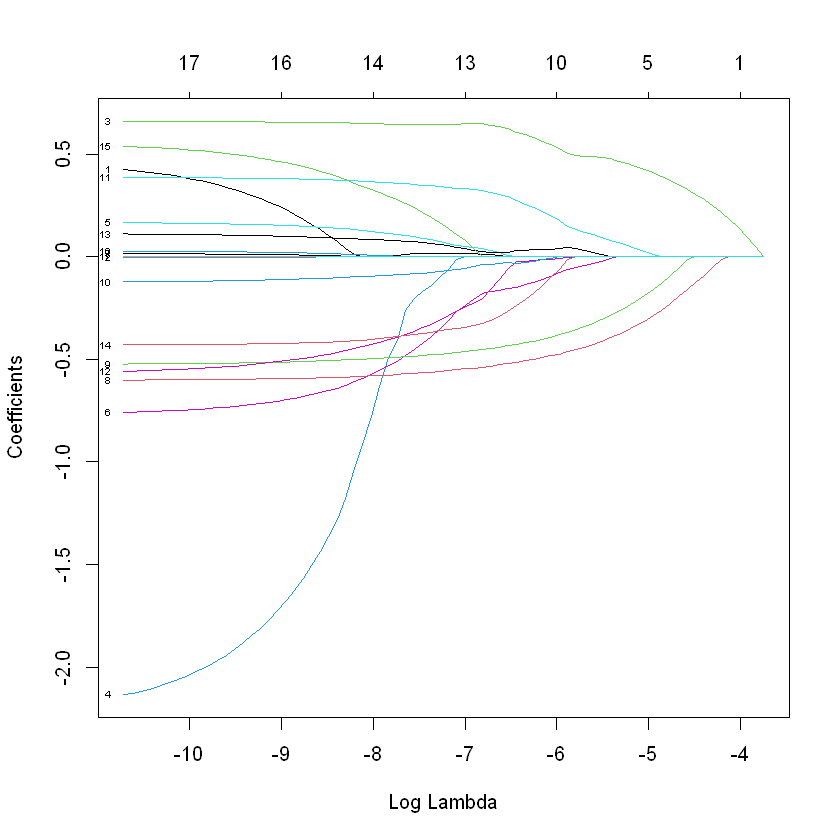

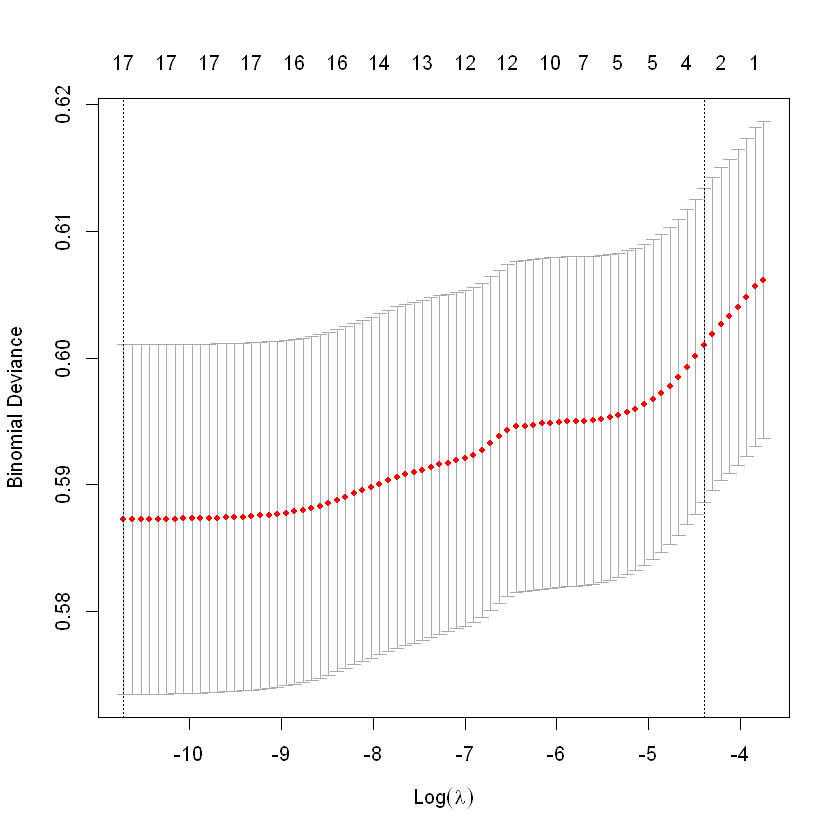

18 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          -3.229132e+00
age                   .           
age_square           -1.365399e-05
male                  3.177378e-01
TC_rcs_1              2.216467e-01
TC_rcs_2              .           
TC_rcs_3             -2.382482e-02
log_LDLC             -1.605734e-01
albuminuria_moderate -7.179879e-01
albuminuria_severe   -3.915120e-01
CKD_stage_G3a        -3.181806e-01
CKD_stage_G3b         .           
CKD_stage_G4         -3.836399e-01
male_CKD_stage_G3a    2.994100e-01
male_CKD_stage_G3b   -4.166659e-02
male_CKD_stage_G4     .           
age_TC                3.448412e-05
age_BMI_TC            3.845137e-05


Setting levels: control = 0, case = 1

Setting direction: controls < cases



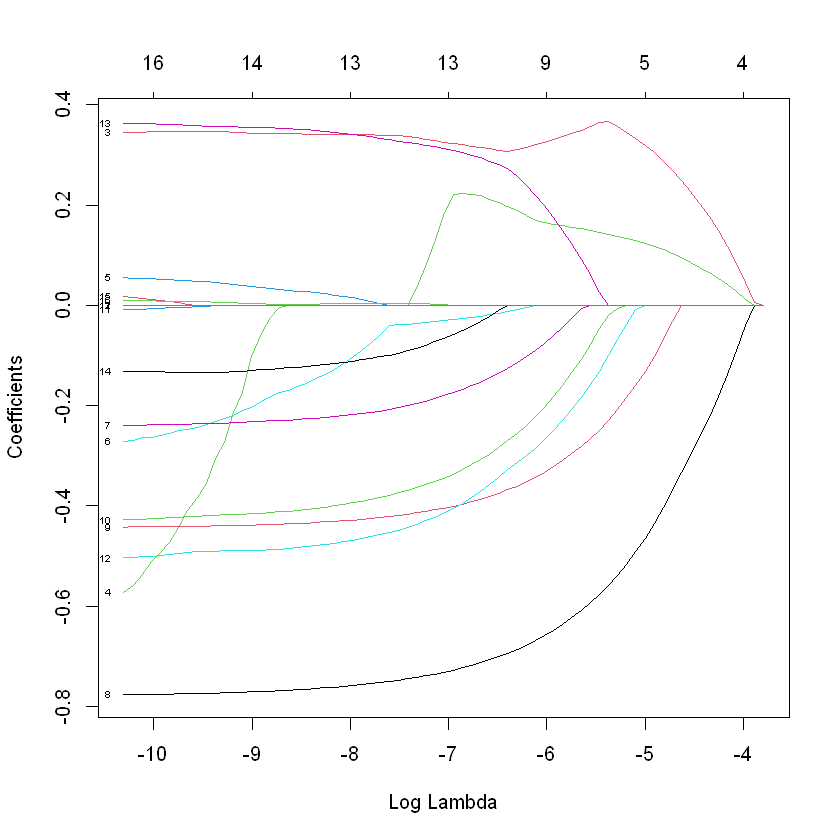

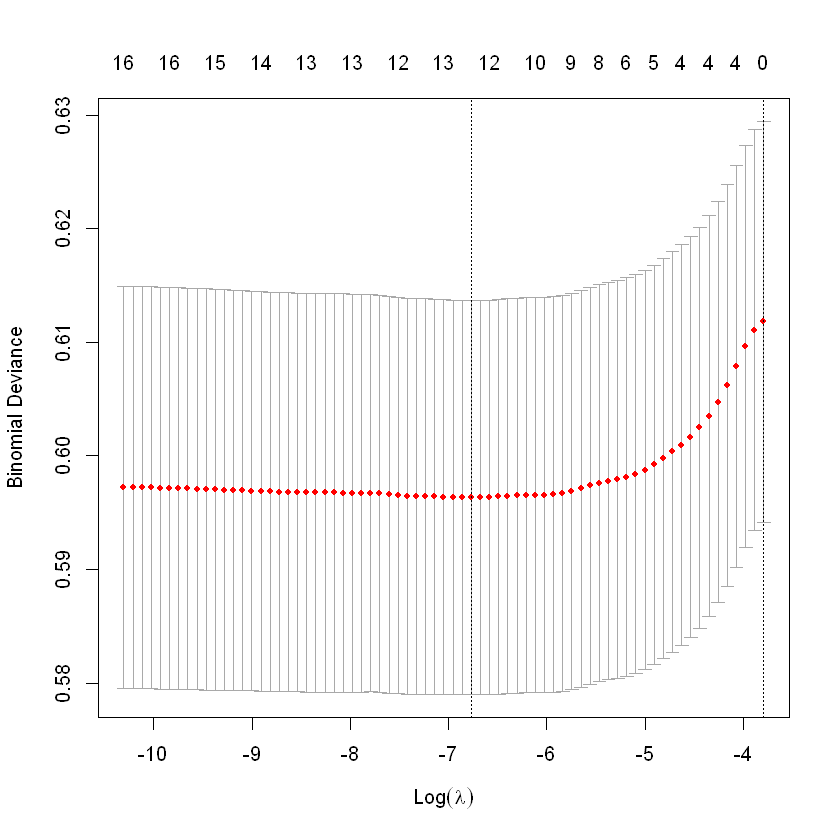

In [4]:
set.seed(123)
bootstrap_samples <- list()
results <- data.frame()
cal <- data.frame()
N <- 2
for (i in 1:N) {
    bootstrap_sample <- dataset[sample(nrow(dataset), replace = TRUE), ]
    bootstrap_samples[[i]] <- bootstrap_sample
    train_data <- bootstrap_samples[[i]]
    test_data <- dataset

    predictors <- c('age', 'age_square', 'male', # 'BMI', 'SBP', 
                    # 'MI', 'HF', 'COPD', 'cancer', 'liver_disease', 'hypoglycemia', 
                    'TC_rcs_1', 'TC_rcs_2', 'TC_rcs_3', 'log_LDLC', 
                    'albuminuria_moderate', 'albuminuria_severe', 
                    'CKD_stage_G3a', 'CKD_stage_G3b', 'CKD_stage_G4',
                    # 'No_outpatient', 'No_inpatient', 
                    # 'age_male', 'male_cancer', 
                    'male_CKD_stage_G3a', 'male_CKD_stage_G3b', 'male_CKD_stage_G4', 
                    'age_TC', 'age_BMI_TC')
    
    # 在训练集上进行模型训练并筛选最优模型 
    formula <- Lasso_binary(data=train_data, binary_outcome="AKI_binary", predictors = predictors, lambda = "min")
    formula
    
    # model refit
    train_model <- glm(as.formula(formula), data = train_data, family=binomial(link="logit"))
    
    # 根据训练集所得的最优模型，在测试集上进行预测
    pre <- predict(train_model, newdata=test_data, type="response")
    
    # 在测试集上计算C统计量
    binary_outcome <- "AKI_binary"
    c_index <- round(somers2(pre, test_data[, binary_outcome])["C"], 4)

    # 在测试集上建立新模型并计算ROC
    roc <- roc(test_data[, binary_outcome], pre)
    AUC <- auc(roc)
    
    result <- data.frame(
        no = i,
        c_index = c_index,
        AUC = round(AUC, 4)
    )
    results <- rbind(results, result)
    
    # 校准曲线
    n_group <- 10
    cal_data <- data.frame(AKI_binary=test_data[[binary_outcome]], pre)
    cal_data <- cal_data[order(cal_data$pre),]
    cal_data <- cal_data %>% 
            mutate(tiles = cut2(pre, g = n_group))
            
    cal_data <- cal_data %>% group_by(tiles) %>% summarise(n = n(),
                      obs_sd = sd(AKI_binary),
                      obs_mean = mean(AKI_binary),
                      pred_mean = mean(pre),
                      obs_upper = obs_mean + 1.96*obs_sd/sqrt(n()),
                      obs_lower = obs_mean - 1.96*obs_sd/sqrt(n()))
    cal_data <- cal_data %>% mutate(no = i)
    cal <- rbind(cal, cal_data)
}

#### （1）C统计量

In [5]:
mean(results[, "c_index"])

[1] 0.6134

上述过程采用常规自助法（Bootstrap regular法）进行内部验证，自助抽样次数为2次，生成2个训练集，经2次LASSO回归筛选变量后拟合模型，在测试集上预测，计算的平均C统计量为0.6134，说明该方法得到的模型区分度较好。

In [6]:
mean(results[, "AUC"])

[1] 0.6134

同上，经LASSO回归筛选变量后得到的模型，采用常规自助法（Bootstrap regular法）进行内部验证，自助抽样次数为2次，计算的ROC曲线下面积AUC为0.6134，其等价于C统计量，说明该方法得到的模型区分度较好。

#### （2）校准曲线

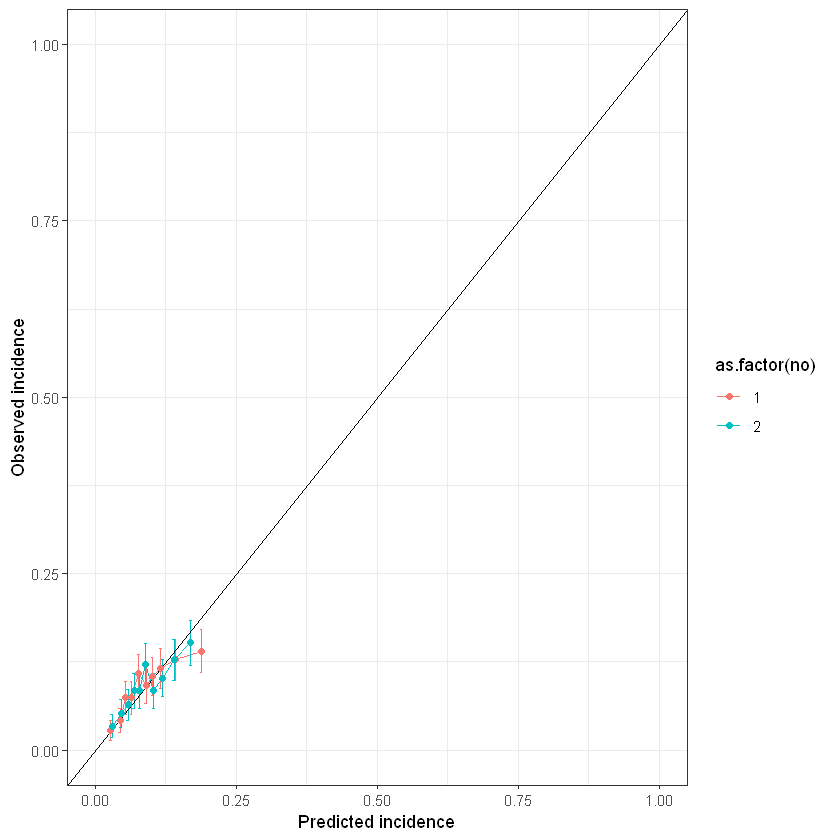

In [7]:
ggplot(cal, aes(x=pred_mean, y=obs_mean, group=as.factor(no), colour = as.factor(no))) +
    geom_line() +
    geom_point() +
    geom_errorbar(aes(ymin=obs_lower, ymax=obs_upper), width=.005) +
    geom_abline() +
    xlab("Predicted incidence") +
    ylab("Observed incidence") +
    scale_x_continuous(limits = c(0, 1)) +
    scale_y_continuous(limits = c(0, 1)) +
    geom_point() + theme_bw()

经LASSO回归筛选变量后得到的模型，采用常规自助法（Bootstrap regular法）进行内部验证，生成的校准曲线如上图所示。

该图横轴对应预测结局概率，纵轴为实际观测概率，两条不同颜色的校准曲线代表2次自助抽样生成的两个训练集拟合模型后的预测结果，每条曲线有10个数据点代表所有预测样本的预测概率按十分位数划分为10份，各点的误差线代表实际观测概率的95%置信区间上下限。

图中校准曲线沿对角线紧密贴合，波动程度较小，说明该方法所得模型校准度较好。

### 3.1.2 交叉验证法

#### 3.1.2.1 随机拆分验证法

In [8]:
# 将数据集进行拆分（例子：80％用于训练logit回归模型，20％用于评估模型性能）
set.seed(123)
training_samples <- sample(nrow(dataset), size = nrow(dataset)*0.8, replace = FALSE) # caret包中的createDataPartition函数可以用来做数据集划分
train_data <- dataset[training_samples, ]
test_data <- dataset[-training_samples, ]

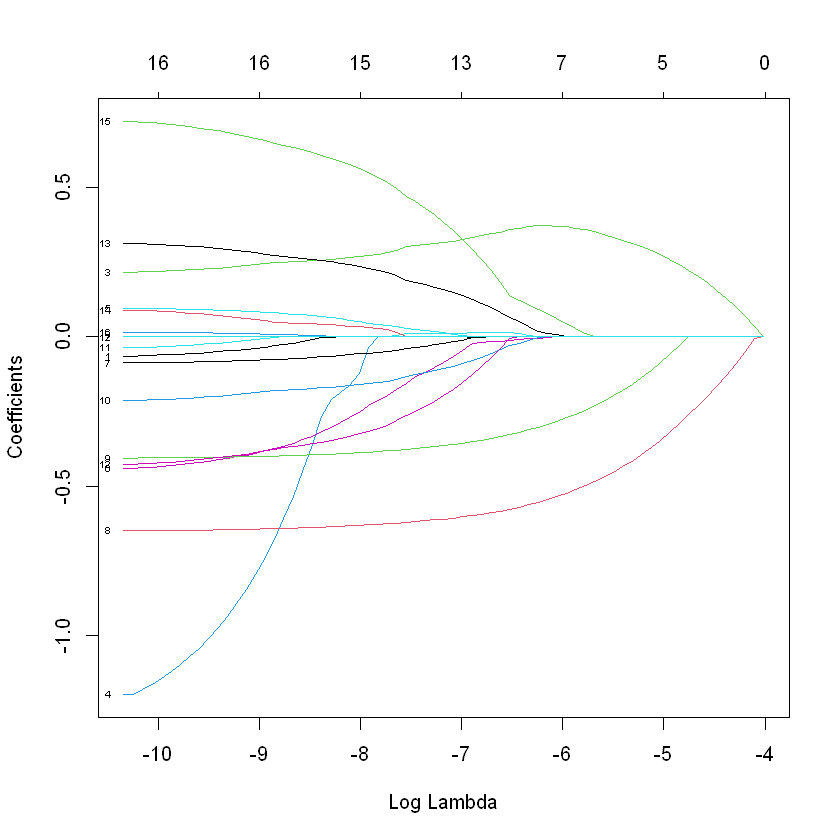

18 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          -3.000917e+00
age                   .           
age_square            .           
male                  3.341261e-01
TC_rcs_1              .           
TC_rcs_2              .           
TC_rcs_3              .           
log_LDLC              .           
albuminuria_moderate -4.527284e-01
albuminuria_severe   -1.972291e-01
CKD_stage_G3a         .           
CKD_stage_G3b         .           
CKD_stage_G4          .           
male_CKD_stage_G3a    .           
male_CKD_stage_G3b    .           
male_CKD_stage_G4     .           
age_TC                2.099025e-03
age_BMI_TC            7.171087e-06


[1] "AKI_binary ~ male + albuminuria_moderate + albuminuria_severe + age_TC + age_BMI_TC"

Setting levels: control = 0, case = 1

Setting direction: controls < cases



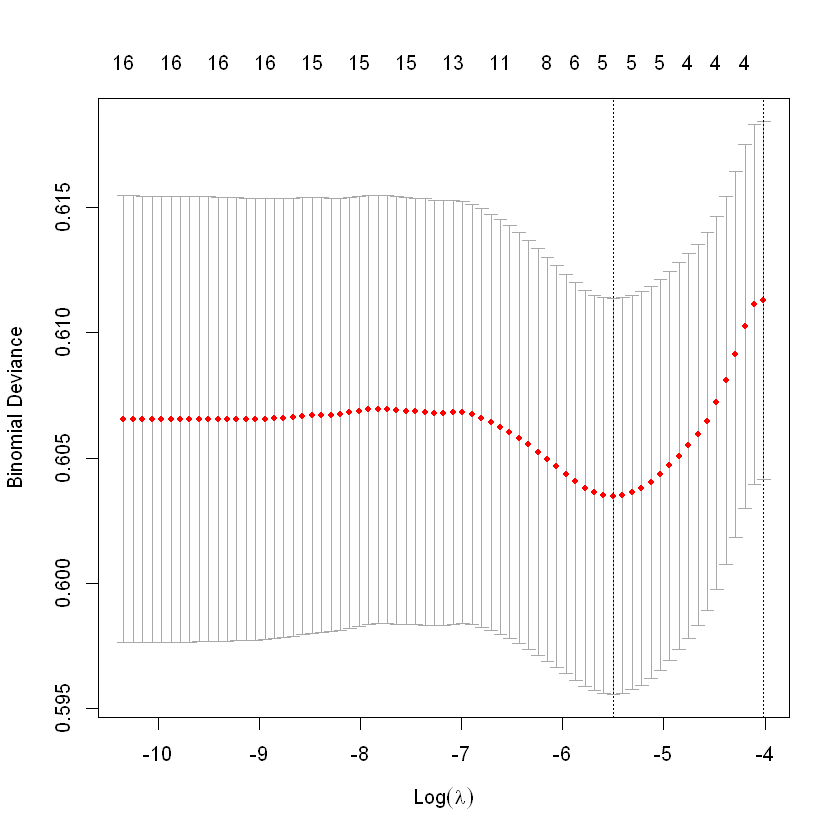

In [9]:
results <- data.frame()
cal <- data.frame()

# 在训练集上进行模型训练并筛选最优模型 
formula <- Lasso_binary(data=train_data, binary_outcome="AKI_binary", predictors = predictors, lambda = "min")
formula
# model refit
train_model <- glm(as.formula(formula), data = train_data, family=binomial(link="logit"))

# 根据训练集所得的最优模型，在测试集上进行预测
pre <- predict(train_model, newdata=test_data, type="response")

# 在测试集上计算C统计量
binary_outcome <- "AKI_binary"
c_index <- round(somers2(pre, test_data[, binary_outcome])["C"], 4)

# 在测试集上建立新模型并计算ROC
roc <- roc(test_data[, binary_outcome], pre)
AUC <- auc(roc)

result <- data.frame(
    no = i,
    c_index = c_index,
    AUC = round(AUC, 4)
)
results <- rbind(results, result)

# 校准曲线
n_group <- 10
cal_data <- data.frame(AKI_binary=test_data[[binary_outcome]], pre)
cal_data <- cal_data[order(cal_data$pre),]
cal_data <- cal_data %>% 
        mutate(tiles = cut2(pre, g = n_group))

cal_data <- cal_data %>% group_by(tiles) %>% summarise(n = n(),
                  obs_sd = sd(AKI_binary),
                  obs_mean = mean(AKI_binary),
                  pred_mean = mean(pre),
                  obs_upper = obs_mean + 1.96*obs_sd/sqrt(n()),
                  obs_lower = obs_mean - 1.96*obs_sd/sqrt(n()))
cal_data <- cal_data %>% mutate(no = i)
cal <- rbind(cal, cal_data)

##### （1）C统计量

In [10]:
mean(results[, "c_index"])

[1] 0.608

上述过程采用交叉验证法（随机拆分验证法）进行内部验证，抽取80%样本作为训练集，剩余20%样本为测试集，最终，经LASSO回归筛选变量后得到的模型，计算的C统计量为0.608，说明区分度较好。

##### （2）校准曲线

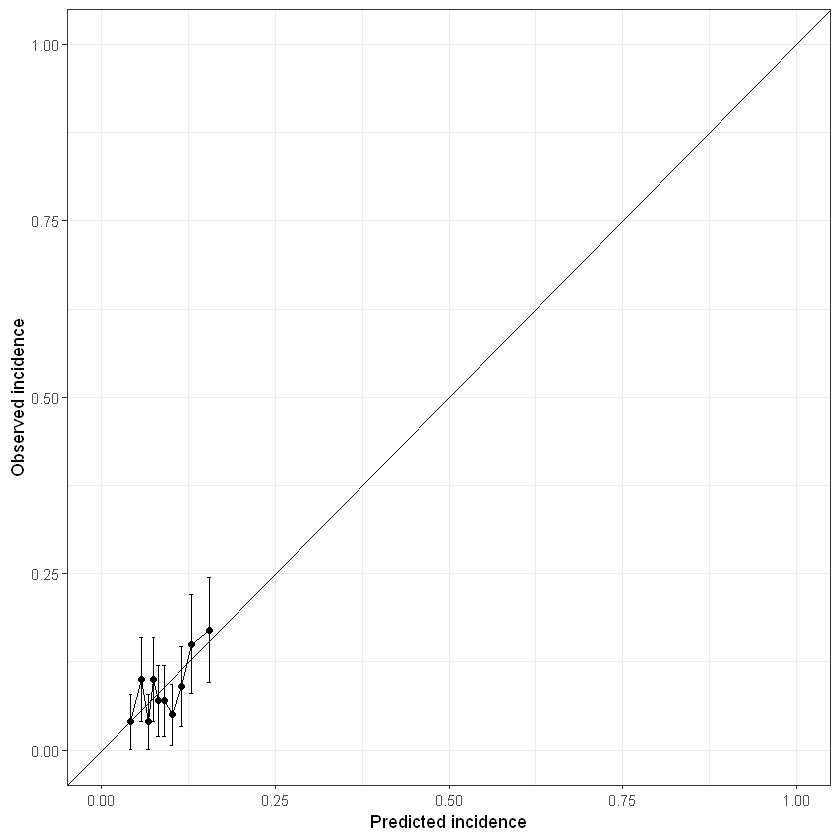

In [11]:
ggplot(cal, aes(x=pred_mean, y=obs_mean)) +
    geom_line() +
    geom_point() +
    geom_errorbar(aes(ymin=obs_lower, ymax=obs_upper), width=.005) +
    geom_abline() +
    xlab("Predicted incidence") +
    ylab("Observed incidence") +
    scale_x_continuous(limits = c(0, 1)) +
    scale_y_continuous(limits = c(0, 1)) +
    geom_point() + theme_bw()

经LASSO回归筛选变量后得到的模型，采用交叉验证法（随机拆分验证法）进行内部验证，生成的校准曲线如上图所示

该图横轴对应预测结局概率，纵轴为实际观测概率，一条曲线有10个数据点代表所有预测样本的预测概率按十分位数划分为10份，各点的误差线代表实际观测概率的95%置信区间上下限。

图中校准曲线沿对角线紧密贴合，波动程度较小，说明该方法所得模型校准度较好。

#### 3.1.2.2 K折交叉验证（更为推荐）

18 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          -2.814198e+00
age                   .           
age_square            .           
male                  2.724390e-01
TC_rcs_1              .           
TC_rcs_2              .           
TC_rcs_3              .           
log_LDLC              .           
albuminuria_moderate -6.176305e-01
albuminuria_severe   -2.314442e-01
CKD_stage_G3a         .           
CKD_stage_G3b         .           
CKD_stage_G4          .           
male_CKD_stage_G3a    7.562135e-02
male_CKD_stage_G3b    .           
male_CKD_stage_G4     .           
age_TC                1.279656e-03
age_BMI_TC            2.144008e-05


Setting levels: control = 0, case = 1

Setting direction: controls < cases



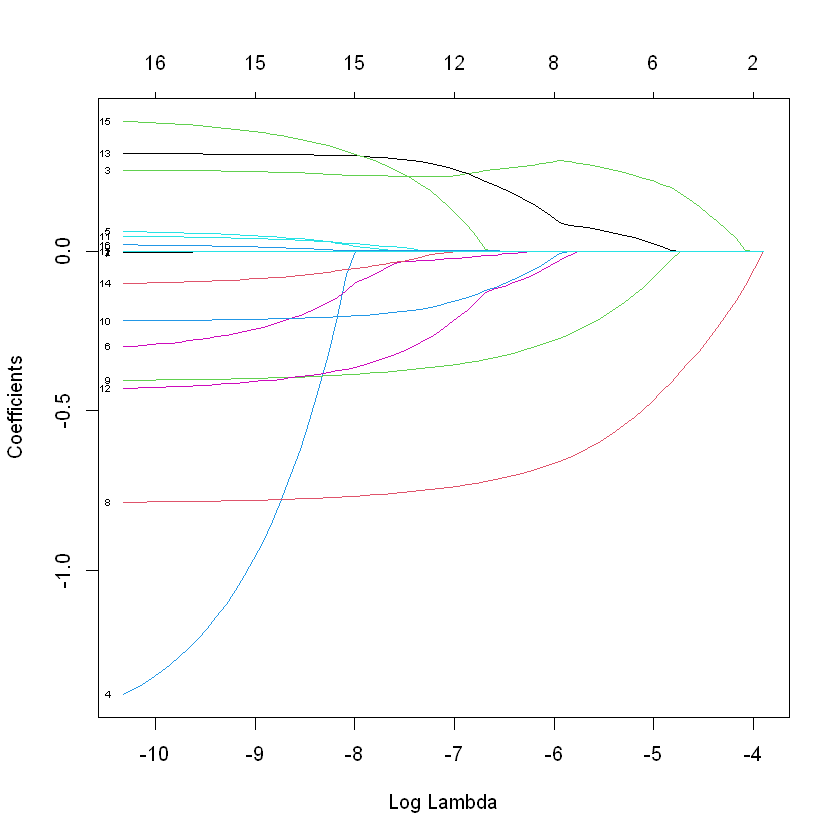

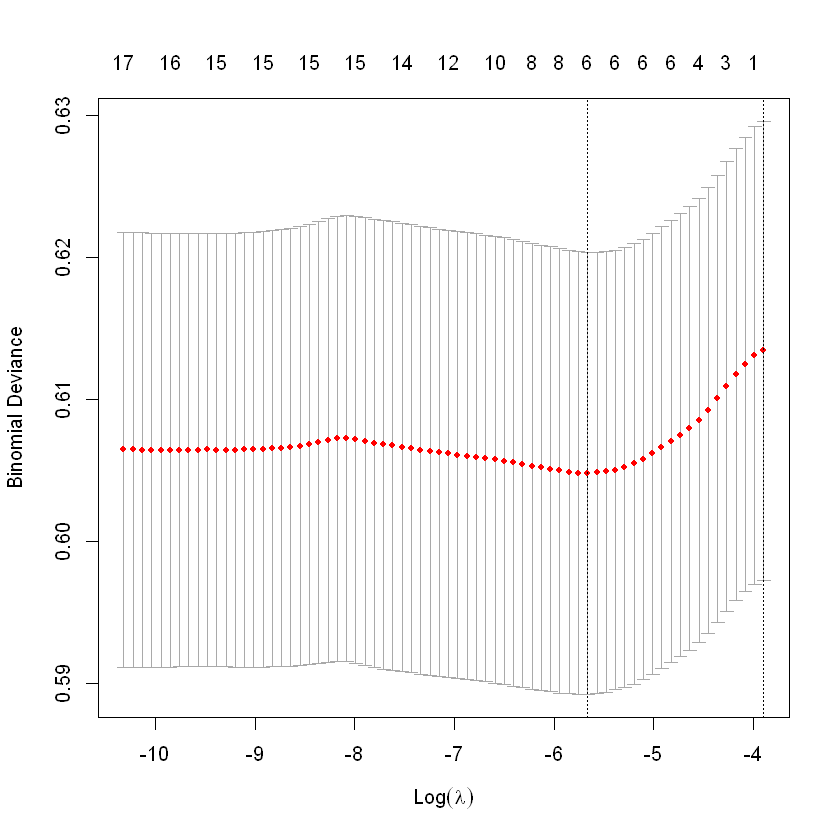

18 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          -3.070355e+00
age                   .           
age_square           -1.184560e-06
male                  3.068670e-01
TC_rcs_1              1.813474e-03
TC_rcs_2              .           
TC_rcs_3             -1.980832e-02
log_LDLC              4.454635e-03
albuminuria_moderate -5.542970e-01
albuminuria_severe   -2.357611e-01
CKD_stage_G3a        -2.141513e-01
CKD_stage_G3b         .           
CKD_stage_G4         -6.001167e-01
male_CKD_stage_G3a    1.478743e-01
male_CKD_stage_G3b    .           
male_CKD_stage_G4     7.077730e-01
age_TC                2.361595e-03
age_BMI_TC            2.966822e-05


Setting levels: control = 0, case = 1

Setting direction: controls < cases



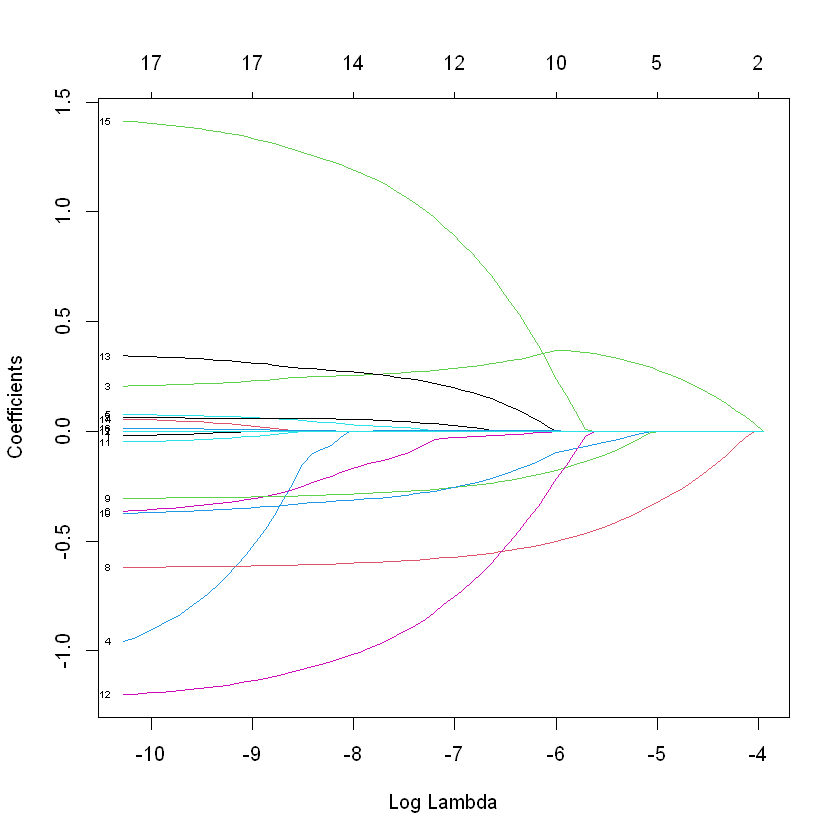

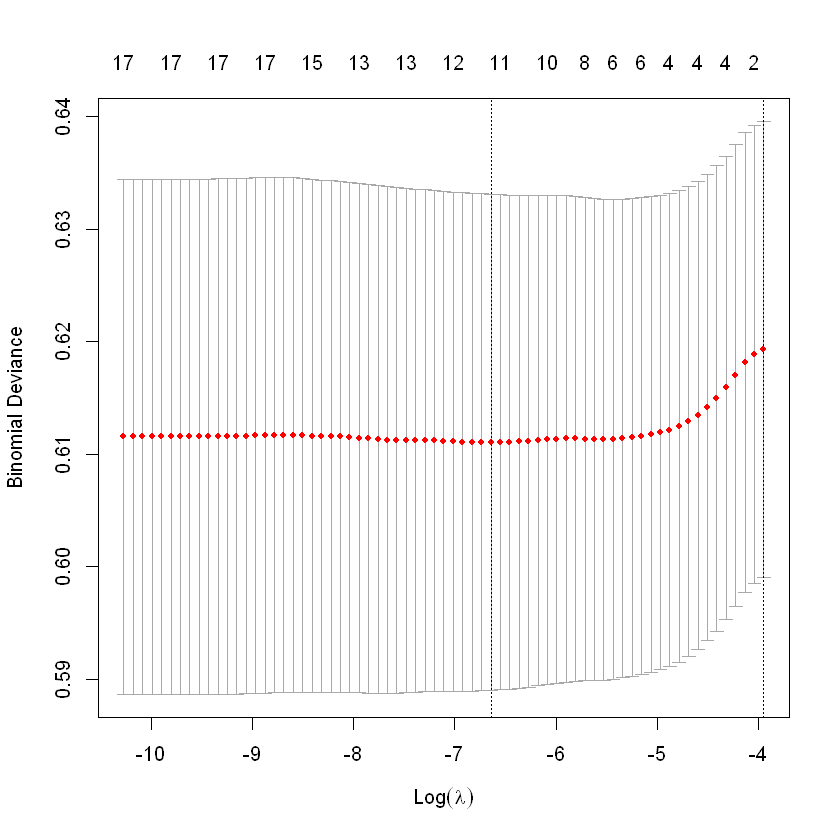

18 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          -3.048658e+00
age                   .           
age_square            .           
male                  3.591496e-01
TC_rcs_1              .           
TC_rcs_2              .           
TC_rcs_3              .           
log_LDLC              .           
albuminuria_moderate -4.108081e-01
albuminuria_severe   -1.180483e-01
CKD_stage_G3a         .           
CKD_stage_G3b         .           
CKD_stage_G4         -1.426021e-03
male_CKD_stage_G3a    4.268031e-02
male_CKD_stage_G3b    .           
male_CKD_stage_G4     .           
age_TC                1.991294e-03
age_BMI_TC            1.669897e-05


Setting levels: control = 0, case = 1

Setting direction: controls < cases



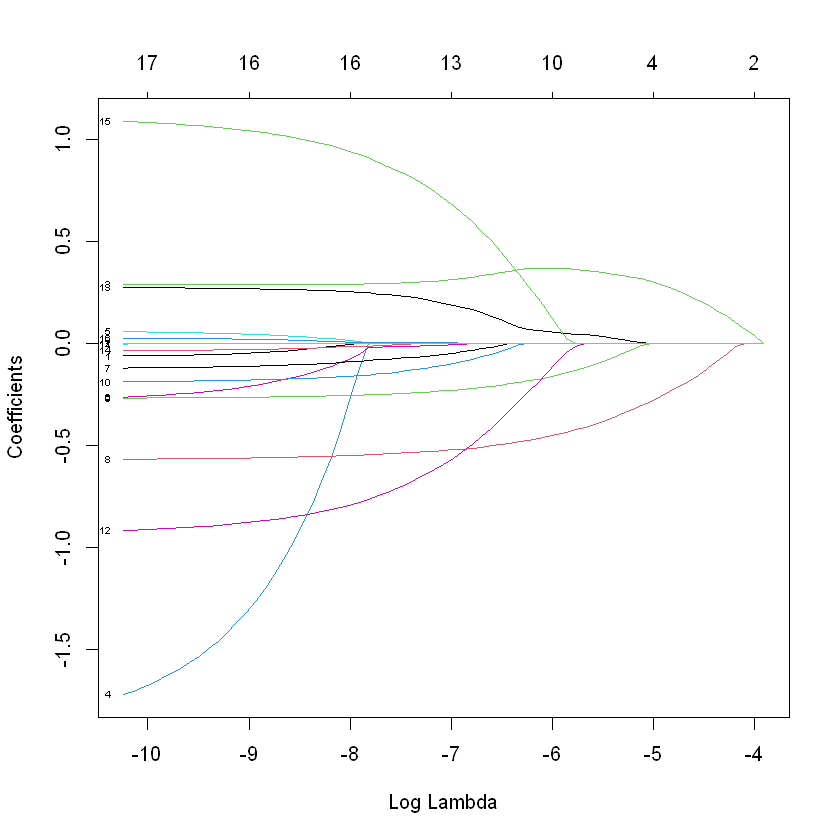

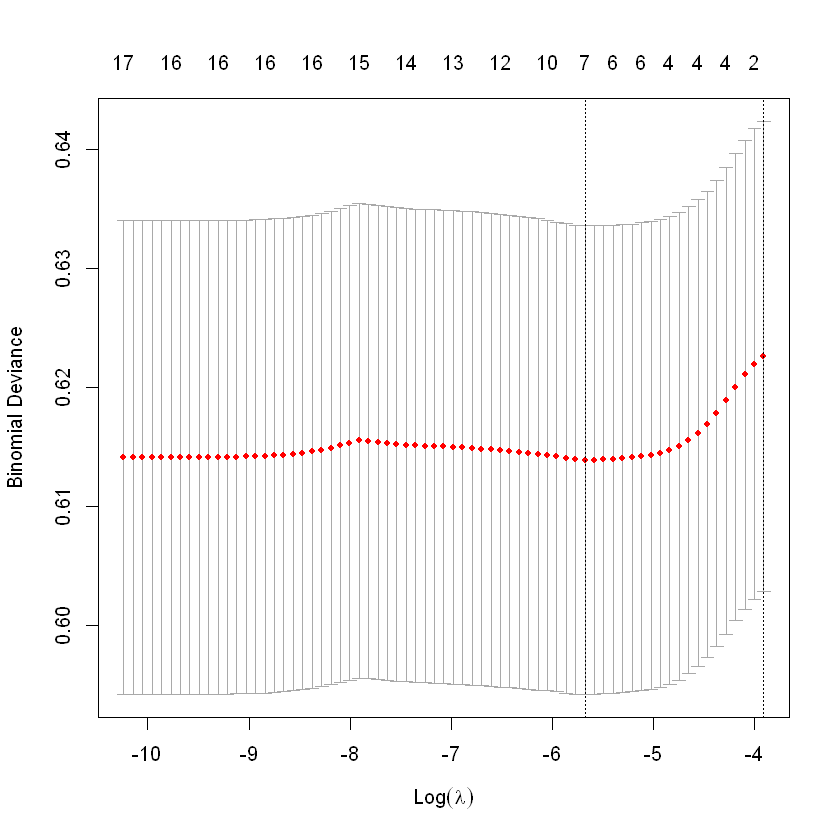

18 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          -3.005038e+00
age                   .           
age_square            .           
male                  3.890615e-01
TC_rcs_1              .           
TC_rcs_2              .           
TC_rcs_3              .           
log_LDLC              .           
albuminuria_moderate -5.953714e-01
albuminuria_severe   -2.036366e-01
CKD_stage_G3a        -2.026747e-02
CKD_stage_G3b         2.816398e-02
CKD_stage_G4          .           
male_CKD_stage_G3a    5.550768e-02
male_CKD_stage_G3b    .           
male_CKD_stage_G4     .           
age_TC                1.308910e-03
age_BMI_TC            3.495001e-05


Setting levels: control = 0, case = 1

Setting direction: controls < cases



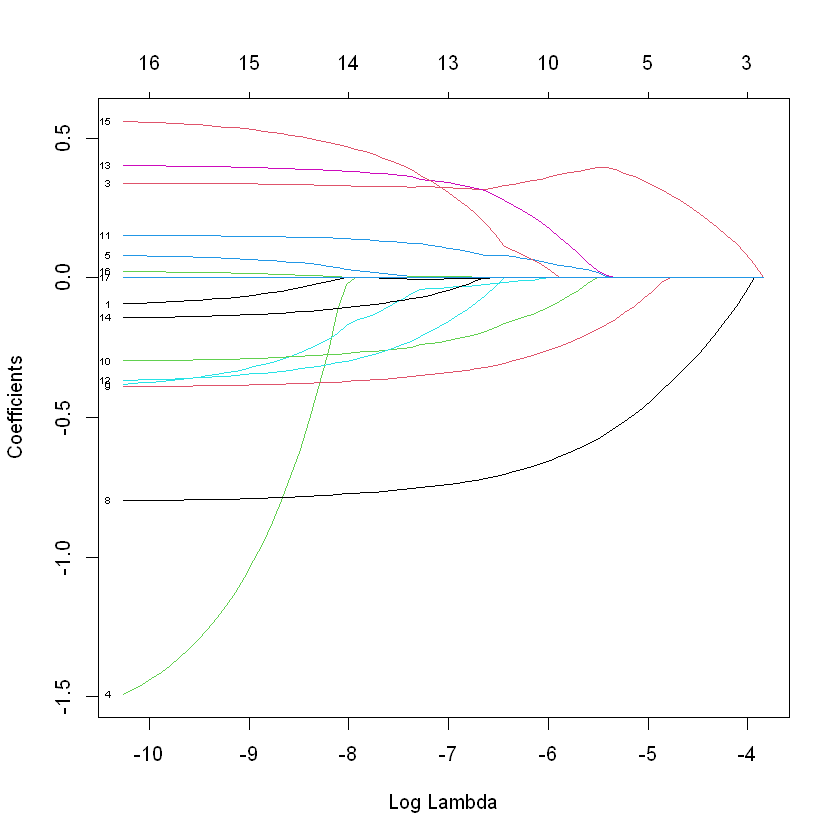

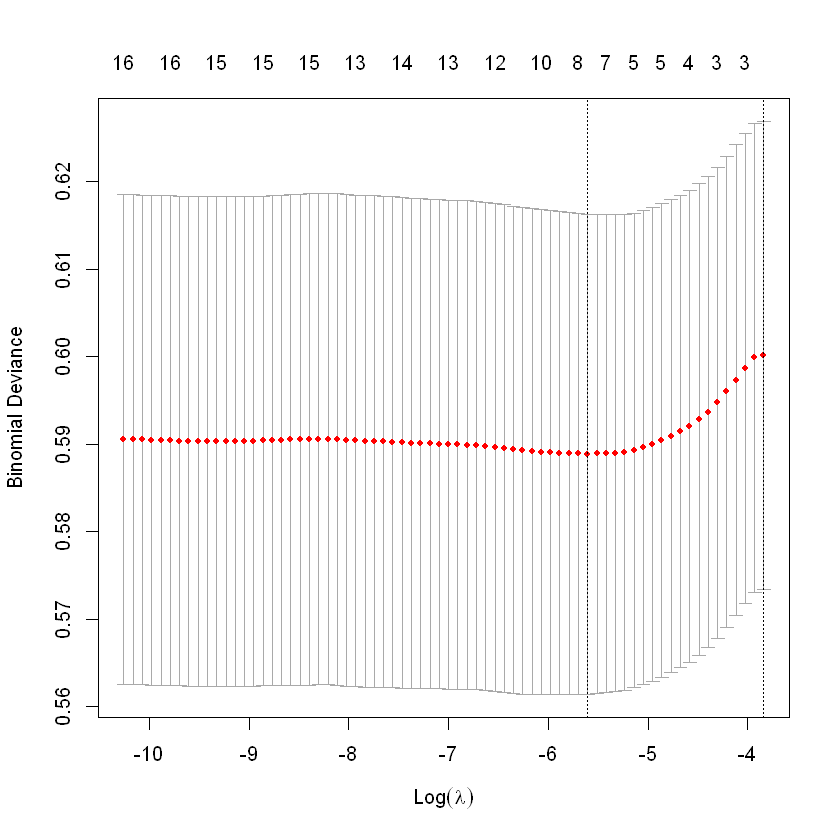

18 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           3.123481e+00
age                  -7.723350e-02
age_square           -3.911893e-05
male                  2.536539e-01
TC_rcs_1             -1.423540e+00
TC_rcs_2              1.036213e-01
TC_rcs_3             -4.686652e-01
log_LDLC              7.137598e-02
albuminuria_moderate -7.829747e-01
albuminuria_severe   -3.608522e-01
CKD_stage_G3a        -2.927070e-01
CKD_stage_G3b        -2.839008e-02
CKD_stage_G4         -5.930316e-01
male_CKD_stage_G3a    3.633881e-01
male_CKD_stage_G3b    5.724734e-02
male_CKD_stage_G4     7.772983e-01
age_TC                1.858687e-02
age_BMI_TC            3.539786e-06


Setting levels: control = 0, case = 1

Setting direction: controls < cases



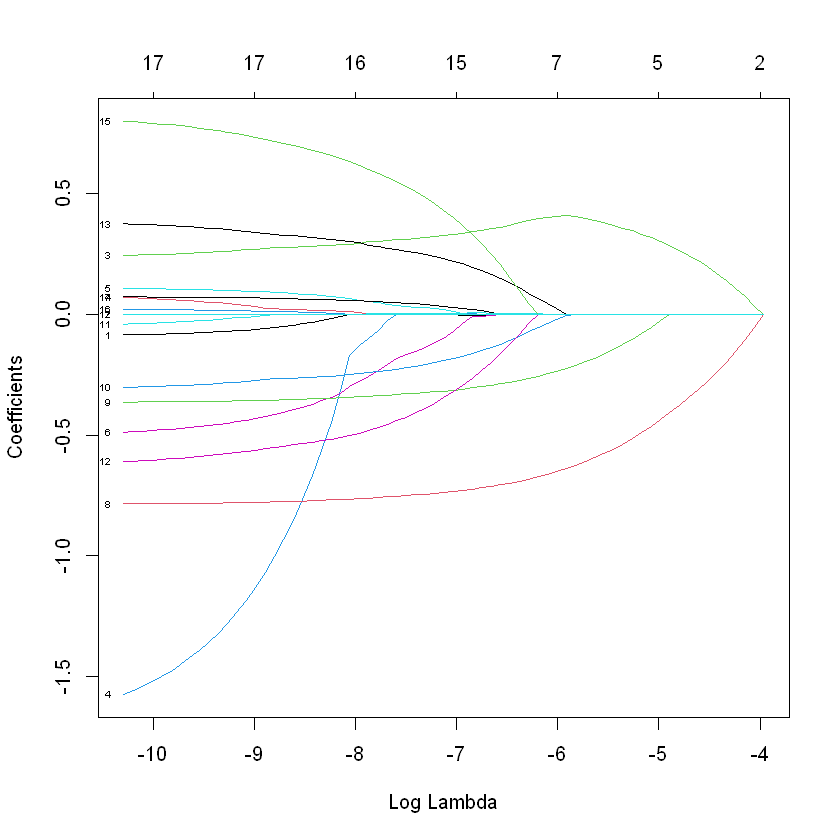

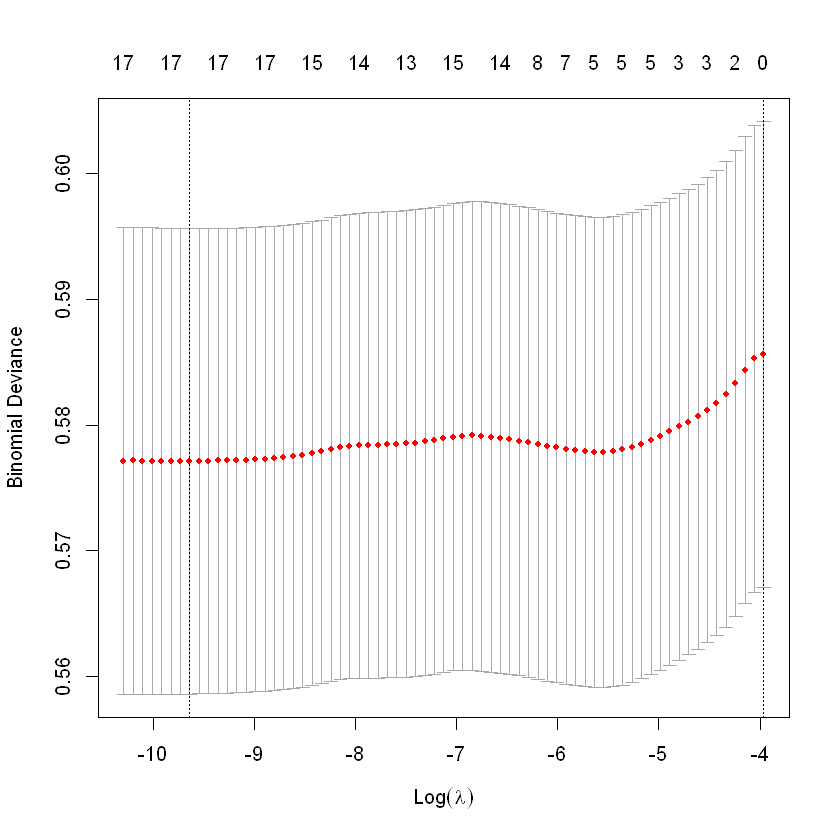

In [12]:
folds <- createFolds(y=dataset[,"AKI_binary"], k=5)
results <- data.frame()
cal <- data.frame()

for(i in 1:5){
    train_data <- dataset[-folds[[i]],] 
    test_data <- dataset[folds[[i]],] 
    
    predictors <- c('age', 'age_square', 'male', # 'BMI', 'SBP', 
                    # 'MI', 'HF', 'COPD', 'cancer', 'liver_disease', 'hypoglycemia', 
                    'TC_rcs_1', 'TC_rcs_2', 'TC_rcs_3', 'log_LDLC', 
                    'albuminuria_moderate', 'albuminuria_severe', 
                    'CKD_stage_G3a', 'CKD_stage_G3b', 'CKD_stage_G4',
                    # 'No_outpatient', 'No_inpatient', 
                    # 'age_male', 'male_cancer', 
                    'male_CKD_stage_G3a', 'male_CKD_stage_G3b', 'male_CKD_stage_G4', 
                    'age_TC', 'age_BMI_TC')
    
    # 在训练集上进行模型训练并筛选最优模型 
    formula <- Lasso_binary(data=train_data, binary_outcome="AKI_binary", predictors = predictors, lambda = "min")
    formula
    
    # model refit
    train_model <- glm(as.formula(formula), data = train_data, family=binomial(link="logit"))
    
    # 根据训练集所得的最优模型，在测试集上进行预测
    pre <- predict(train_model, newdata=test_data, type="response")
    
    # 在测试集上计算C统计量
    binary_outcome <- "AKI_binary"
    c_index <- round(somers2(pre, test_data[, binary_outcome])["C"], 4)

    # 在测试集上建立新模型并计算ROC
    roc <- roc(test_data[, binary_outcome], pre)
    AUC <- auc(roc)
    
    result <- data.frame(
        no = i,
        c_index = c_index,
        AUC = round(AUC, 4)
    )
    results <- rbind(results, result)
    
    # 校准曲线
    n_group <- 10
    cal_data <- data.frame(AKI_binary=test_data[[binary_outcome]], pre)
    cal_data <- cal_data[order(cal_data$pre),]
    cal_data <- cal_data %>% 
            mutate(tiles = cut2(pre, g = n_group))
            
    cal_data <- cal_data %>% group_by(tiles) %>% summarise(n = n(),
                      obs_sd = sd(AKI_binary),
                      obs_mean = mean(AKI_binary),
                      pred_mean = mean(pre),
                      obs_upper = obs_mean + 1.96*obs_sd/sqrt(n()),
                      obs_lower = obs_mean - 1.96*obs_sd/sqrt(n()))
    cal_data <- cal_data %>% mutate(no = i)
    cal <- rbind(cal, cal_data)
}

##### （1）C统计量

In [13]:
mean(results[, "c_index"])

[1] 0.60002

上述过程采用交叉验证法（5折交叉验证）进行内部验证，原数据集被拆为5个子集，轮流作为测试集与其他情况下的训练集，经5次LASSO回归筛选变量后拟合模型，计算的平均C统计量为0.60002，说明该方法得到的模型区分度较好。

##### （2）校准曲线

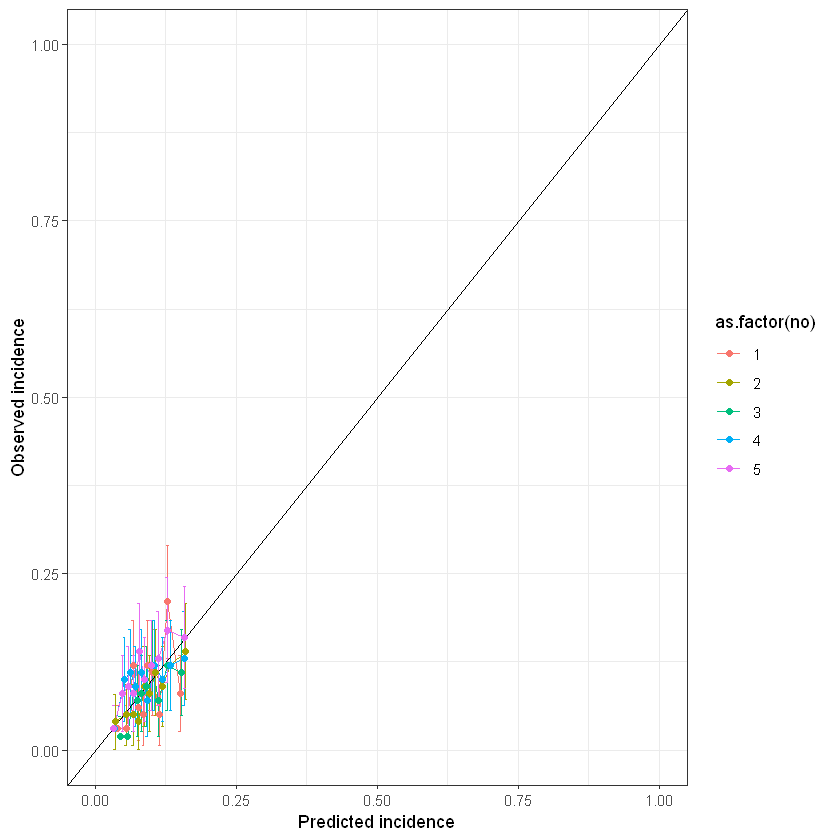

In [14]:
ggplot(cal, aes(x=pred_mean, y=obs_mean, group=as.factor(no), colour = as.factor(no))) +
    geom_line() +
    geom_point() +
    geom_errorbar(aes(ymin=obs_lower, ymax=obs_upper), width=.005) +
    geom_abline() +
    xlab("Predicted incidence") +
    ylab("Observed incidence") +
    scale_x_continuous(limits = c(0, 1)) +
    scale_y_continuous(limits = c(0, 1)) + 
    geom_point() + theme_bw()

经LASSO回归筛选变量后得到的模型，采用交叉验证法（5折交叉验证）进行内部验证，生成的校准曲线如上图所示。

该图横轴对应预测结局概率，纵轴为实际观测概率，5条不同颜色的校准曲线代表拆分成的5个子集轮流作为测试集与训练集之一、经5次拟合模型后的预测结果，每条曲线有10个数据点代表所有预测样本的预测概率按十分位数划分为10份，各点的误差线代表实际观测概率的95%置信区间上下限。

图中所有校准曲线沿对角线紧密贴合，波动程度较小，说明该方法所得模型校准度较好。

## 3.2 外部验证

### 应用别人文章的里面的模型

In [15]:
pre <- function (beta0, beta, predictors, data) {
    design_matrix <- as.matrix(data[,predictors])
    score <-  design_matrix %*% as.matrix(beta) + beta0
    pre <- exp(score) / (1 + exp(score))
    return(pre)
}

### 自己筛选的模型

In [16]:
# 根据lasso回归筛选的变量并通过model refit得到的模型
formula(train_model_lasso_refit)

AKI_binary ~ age + age_square + male + TC_rcs_1 + TC_rcs_2 + 
    TC_rcs_3 + albuminuria_moderate + albuminuria_severe + CKD_stage_G3a + 
    CKD_stage_G3b + CKD_stage_G4 + male_CKD_stage_G3a + male_CKD_stage_G3b + 
    male_CKD_stage_G4 + age_TC + age_BMI_TC

In [17]:
# model refit得到的模型在外部测试集上进行预测
pre <- predict(train_model_lasso_refit, newdata = dataset_external, type = "response")

### （1）C统计量（区分度）

In [18]:
# 在测试集上计算C统计量
binary_outcome <- "AKI_binary"
c_index <- round(somers2(pre, dataset_external[, binary_outcome])["C"], 4)
c_index

C 
0.6159

在训练集上经LASSO回归筛选变量并重新拟合后的模型，在外部测试集上预测得到的C统计量为0.6159，说明区分度较好。

### （2）校准曲线（校准度）

In [19]:
# 校准曲线
n_group <- 10
cal_data <- data.frame(AKI_binary=dataset_external[[binary_outcome]], pre)
cal_data <- cal_data[order(cal_data$pre),]
cal_data <- cal_data %>% mutate(tiles = cut2(pre, g = n_group))
cal_data <- cal_data %>% group_by(tiles) %>% summarise(n = n(),
                  obs_sd = sd(AKI_binary),
                  obs_mean = mean(AKI_binary),
                  pred_mean = mean(pre),
                  obs_upper = obs_mean + 1.96*obs_sd/sqrt(n()),
                  obs_lower = obs_mean - 1.96*obs_sd/sqrt(n()))

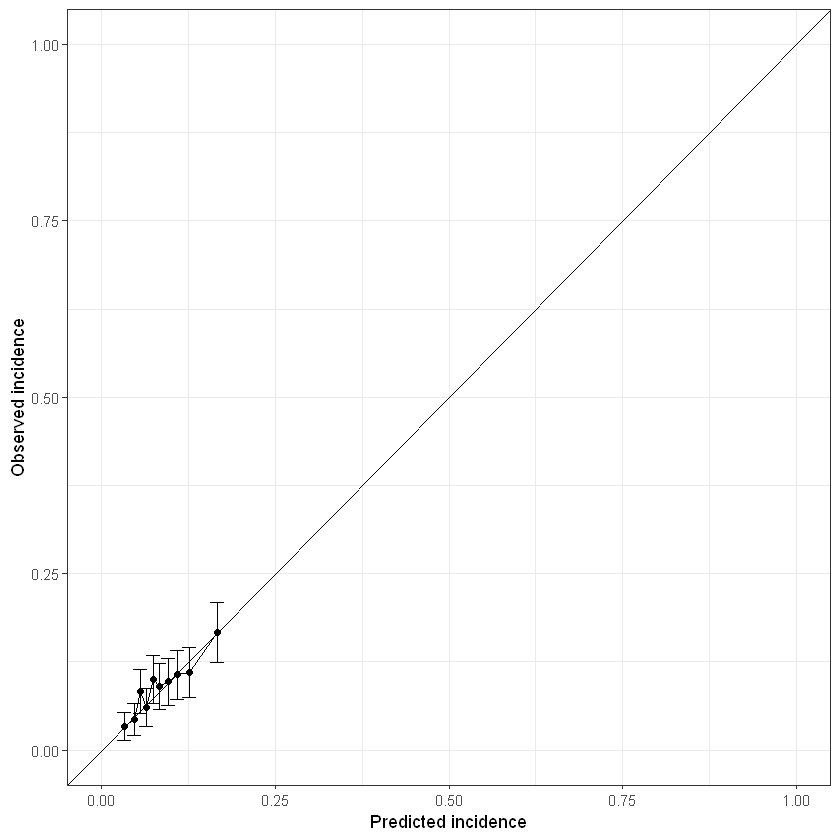

In [20]:
ggplot(cal_data, aes(x=pred_mean, y=obs_mean)) +
    geom_line() +
    geom_point() +
    geom_errorbar(aes(ymin=obs_lower, ymax=obs_upper), width=.02) +
    geom_abline() +
    xlab("Predicted incidence") +
    ylab("Observed incidence") +
    scale_x_continuous(limits = c(0, 1)) +
    scale_y_continuous(limits = c(0, 1)) +
    geom_point() + theme_bw()

在训练集上经LASSO回归筛选变量并重新拟合后的模型，在外部测试集上计算得到的校准曲线如图所示。

该图横轴对应预测结局概率，纵轴为实际观测概率，10个数据点代表所有预测样本的预测概率按十分位数划分为10份，各点的误差线代表实际观测概率的95%置信区间上下限。

图中所有校准曲线沿对角线紧密贴合，波动程度较小，说明该方法所得模型校准度较好。

### （3）决策曲线

Warning message:
"Removed 389 rows containing missing values (`geom_line()`)."


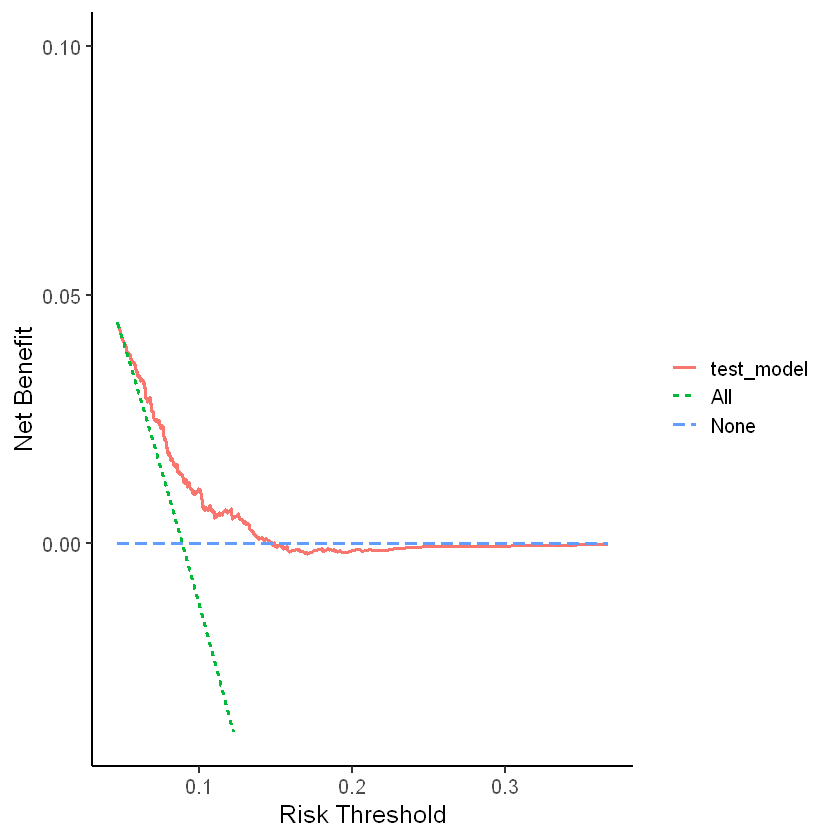

In [21]:
train_model <- glm(formula(train_model_lasso_refit), data = dataset, family = binomial(link = "logit"))
pre <- predict(train_model, newdata = dataset_external, type = "response")
test_model <- glm(AKI_binary ~ pre, data = dataset_external, family=binomial(link="logit"))
dca_plot <- ggDCA::dca(test_model)
ggplot(dca_plot)

在训练集上经LASSO回归筛选变量并重新拟合后的模型，在外部测试集上计算得到的决策曲线如图所示。

该图横轴代表阈概率，纵轴代表净获益，“All”参考线与“None”参考线分别代表所有的患者均纳入干预与均不纳入干预时各阈概率下的净获益水平。

可见，阈概率在约＜0.15的水平下时，该模型存在一定获益。

Warning message:
"Removed 2951 rows containing missing values (`geom_line()`)."


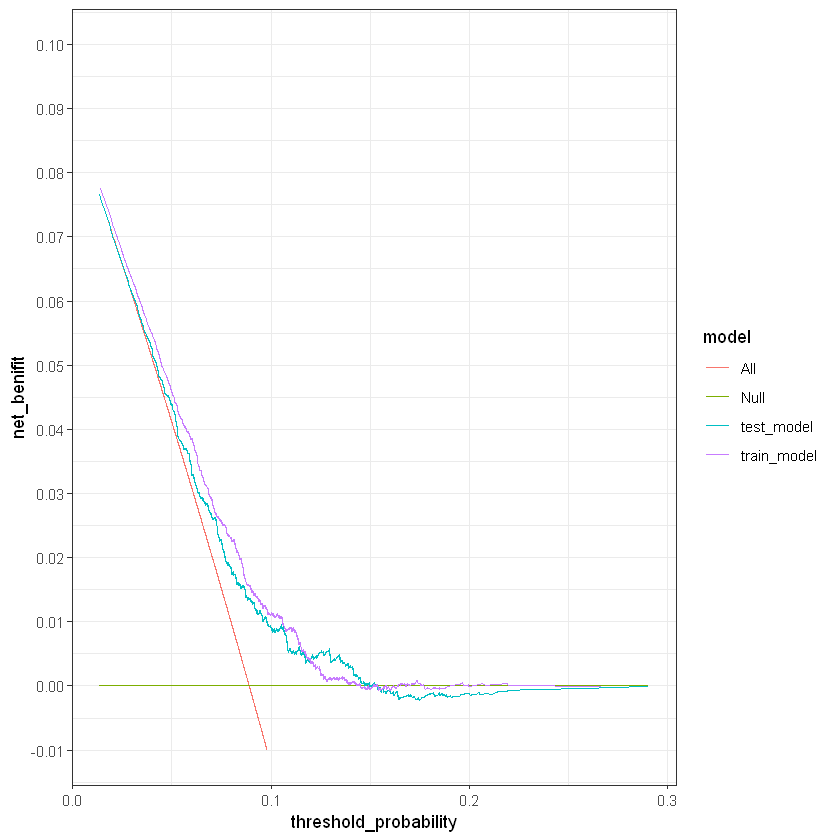

In [22]:
# 自己写一个
train_model <- glm(formula(train_model_lasso_refit), data = dataset, family = binomial(link = "logit"))
pred1 <- predict(train_model, type = "response")
dataset$pred1 <- pred1

pred <- predict(train_model, newdata = dataset_external, type = "response")
dataset_external$pred <- pred

pt <- sort(unique(c(pred, pred1)))
results <- data.frame()
results_train <- data.frame()
results_test <- data.frame()
results_null <- data.frame()
results_all <- data.frame()

results_null <- data.frame(
        threshold_probability = pt,
        net_benifit = 0,
        model = "Null"
)

results_all <- lapply(pt, function(x) {
    temp <- dataset_external
    TP <- sum(temp$AKI_binary == 1)
    FP <- sum(temp$AKI_binary == 0)
    weightingfactor <- x / (1 - x)
    netbenefit <- TP / nrow(temp) - FP / nrow(temp) * weightingfactor
    data.frame(
        threshold_probability = x,
        net_benifit = netbenefit,
        model = "All"
    )
})
results_all <- do.call(rbind, results_all)

results_test <- lapply(pt, function(x) {
    temp <- dataset_external
    TP <- sum(temp$pred >= x & temp$AKI_binary == 1)
    FP <- sum(temp$pred >= x & temp$AKI_binary == 0)
    weightingfactor <- x/(1 - x)
    netbenefit <- TP / nrow(temp) - FP / nrow(temp) * weightingfactor
    
    data.frame(
        threshold_probability = x,
        net_benifit = netbenefit,
        model = "test_model"
    )
})
results_test <- do.call(rbind, results_test)

pt1 <- sort(unique(pred1))
results_train <- lapply(pt1, function(x) {
    temp <- dataset
    TP <- sum(temp$pred1 >= x & temp$AKI_binary == 1)
    FP <- sum(temp$pred1 >= x & temp$AKI_binary == 0)
    weightingfactor <- x / (1 - x)
    netbenefit <- TP / nrow(temp) - FP / nrow(temp) * weightingfactor
    
    data.frame(
        threshold_probability = x,
        net_benifit = netbenefit,
        model = "train_model"
    )
})
results_train <- do.call(rbind, results_train)

results <- rbind(results_null, results_all, results_train, results_test)

ggplot(results, aes(x = threshold_probability, y = net_benifit, group = model, colour = model),) + 
    geom_line() +
    scale_y_continuous(limits=c(-0.01, 0.1), n.breaks = 10) + 
    theme_bw()

In [23]:
save.image("model_validation_binary_workspace.Rdata")

在训练集上经LASSO回归筛选变量并重新拟合后的模型，在原始训练集和外部测试集上分别进行预测，计算得到的决策曲线如图所示。

该图横轴代表阈概率，纵轴代表净获益，“All”参考线与“Null”参考线分别代表所有的患者均纳入干预与均不纳入干预时各阈概率下的净获益水平。

可见，阈概率在约＜0.15的水平下时，该模型存在一定获益；在约＜0.12的水平下时，该模型在训练集进行预测显现出的净获益水平更好。